# Importar las dependencias necesarias para el proyecto

In [ ]:
import tensorflow as tf
import pandas as pd

In [ ]:
tf.__version__

'2.4.1'

# Cargar el dataset

In [ ]:
datos=pd.read_csv("Datos_csv.csv")
columnas = list(datos.columns)
columnas[-3] = "l"
columnas[-2] = "D"
columnas[-1] = "alpha"
datos.columns = columnas
datos

,Pt_Ampl1,Pt_Ampl2,Pt_Ampl3,Pt_Ampl4,Pt_Ampl5,Pt_Ampl6,Pt_Ampl7,Pt_Ampl8,Pt_Ampl9,Pt_Ampl10,Pt_Ampl11,Pt_Ampl12,Pt_Ampl13,Pt_Ampl14,Pt_Ampl15,Pt_Ampl16,Pt_Ampl17,Pt_Ampl18,Pt_Ampl19,Pt_Ampl20,Pt_Ampl21,Pt_Ampl22,Pt_Ampl23,Pt_Ampl24,Pt_Ampl25,Pt_Ampl26,Pt_Ampl27,Pt_Ampl28,Pt_Ampl29,Pt_Ampl30,Pt_Ampl31,Pt_Ampl32,Pt_Ampl33,Pt_Ampl34,Pt_Ampl35,Pt_Ampl36,Pt_Ampl37,Pt_Ampl38,Pt_Ampl39,Pt_Ampl40,...,Pt_phase14,Pt_phase15,Pt_phase16,Pt_phase17,Pt_phase18,Pt_phase19,Pt_phase20,Pt_phase21,Pt_phase22,Pt_phase23,Pt_phase24,Pt_phase25,Pt_phase26,Pt_phase27,Pt_phase28,Pt_phase29,Pt_phase30,Pt_phase31,Pt_phase32,Pt_phase33,Pt_phase34,Pt_phase35,Pt_phase36,Pt_phase37,Pt_phase38,Pt_phase39,Pt_phase40,Pt_phase41,Pt_phase42,Pt_phase43,Pt_phase44,Pt_phase45,Pt_phase46,Pt_phase47,Pt_phase48,Pt_phase49,Pt_phase50,l,D,alpha
0,-22.024122,-87.379298,-95.568521,-100.757633,-104.678300,-107.886118,-110.634945,-113.062561,-115.252114,-117.257542,-119.115687,-120.852708,-122.487739,-124.035113,-125.505778,-126.908240,-128.249204,-129.534034,-130.767078,-131.951910,-133.091509,-134.188399,-135.244747,-136.262445,-137.243171,-138.188436,-139.099617,-139.977988,-140.824738,-141.640989,-142.427806,-143.186207,-143.917169,-144.621633,-145.300510,-145.954680,-146.584995,-147.192285,-147.777352,-148.340977,...,158.434771,155.106947,152.029710,149.185748,146.559245,144.135491,141.900630,139.841482,137.945438,136.200392,134.594701,133.117164,131.757019,130.503939,129.348035,128.279862,127.290419,126.371147,125.513933,124.711097,123.955390,123.239982,122.558450,121.904768,121.273292,120.658745,120.056210,119.461108,118.869194,118.276540,117.679524,117.074819,116.459384,115.830449,115.185508,114.522307,113.838834,150.0,8.0000,2.15000
1,-22.022606,-87.390814,-95.585297,-100.778465,-104.702601,-107.913518,-110.665183,-113.095437,-115.287470,-117.295245,-119.155625,-120.894781,-122.531856,-124.081191,-125.553739,-126.958006,-128.300701,-129.587188,-130.821814,-132.008153,-133.149182,-134.247423,-135.305041,-136.323926,-137.305752,-138.252027,-139.164127,-140.043322,-140.890799,-141.707678,-142.495022,-143.253847,-143.985130,-144.689811,-145.368801,-146.022979,-146.653202,-147.260297,-147.845070,-148.408306,...,158.208342,154.876142,151.795138,148.947978,146.318809,143.892887,141.656323,139.595906,137.698995,135.953452,134.347601,132.870207,131.510472,130.258032,129.102959,128.035767,127.047413,126.129295,125.273254,124.471566,123.716937,123.002491,122.321762,121.668680,121.037560,120.423086,119.820304,119.224604,118.631711,118.037671,117.438842,116.831881,116.213733,115.581622,114.933039,114.265732,113.577693,150.4,8.0014,2.15080
2,-22.021090,-87.402333,-95.602078,-100.799301,-104.726907,-107.940924,-110.695426,-113.128318,-115.322830,-117.332952,-119.195566,-120.936856,-122.575975,-124.127269,-125.601696,-127.007766,-128.352190,-129.640330,-130.876534,-132.064375,-133.206829,-134.306415,-135.365296,-136.385359,-137.368276,-138.315552,-139.228560,-140.108567,-140.956758,-141.774251,-142.562106,-143.321340,-144.052926,-144.757806,-145.436890,-146.091057,-146.721166,-147.328045,-147.912504,-148.475327,...,157.981713,154.645128,151.560350,148.709987,146.078147,143.650053,141.411782,139.350091,137.452310,135.706267,134.100251,132.622995,131.263664,130.011855,128.857602,127.791377,126.804094,125.887108,125.032214,124.231643,123.478055,122.764528,122.084552,121.432013,120.801184,120.186713,119.583607,118.987225,118.393262,117.797740,117.196997,116.587673,115.966702,115.331303,114.678963,114.007433,113.314713,150.8,8.0028,2.15160
3,-22.019575,-87.413855,-95.618863,-100.820143,-104.751219,-107.968336,-110.725675,-113.161204,-115.358195,-117.370664,-119.235510,-120.978933,-122.620094,-124.173345,-125.649650,-127.057521,-128.403669,-129.693458,-130.931237,-132.120575,-133.264448,-134.365373,-135.425509,-136.446742,-137.430741,-138.379008,-139.292913,-140.173720,-141.022612,-141.840705,-142.629057,-143.388682,-144.120554,-144.825615,-145.504772,-146.158909,-146.788883,-147.395525

# Pre  procesamiento del dataset

In [ ]:
X=datos.iloc[:,:-3]
Y_l=datos.iloc[:,-3:-2]
Y_D=datos.iloc[:,-2:-1]
Y_alpha=datos.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X,Y_l,test_size=0.33)
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(X,Y_D,test_size=0.33)
X_train_alpha, X_test_alpha, y_train_alpha, y_test_alpha = train_test_split(X,Y_alpha,test_size=0.33)

In [ ]:
y_test_l

,l
18,157.2
528,361.2
793,467.2
1093,587.2
389,305.6
...,...
976,540.4
80,182.0
202,230.8
1217,636.8


In [ ]:
y_test_D

,D
1068,9.3544
1231,9.4848
8,8.0112
336,8.4704
773,9.0730
...,...
974,9.2740
1105,9.3840
544,8.7616
265,8.3710


In [ ]:
y_test_alpha

,alpha
626,2.6508
490,2.5420
40,2.1820
331,2.4148
566,2.6028
...,...
232,2.3356
505,2.5540
114,2.2412
864,2.7956


# Construcción de la Red Neuronal Artificial

In [ ]:
def get_model():
    #Construyendo el modelo
    model=tf.keras.models.Sequential()
    #Añadimos la primera capa 
    model.add(tf.keras.layers.Dense(units=100,activation="relu",input_shape=(100,)))
    #Añadimos otra capa                                                                                                                                                                                    
    model.add(tf.keras.layers.Dense(units=50,activation="relu",))
    #Añadimos una capa de Dropout
    model.add(tf.keras.layers.Dropout(0.2))
    #Añadimos una capa de salida
    model.add(tf.keras.layers.Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

model_l = get_model()
model_D = get_model()
model_alpha = get_model()


# Entrenamiento de las redes neuronales

In [ ]:
history_l = model_l.fit(X_train_l , y_train_l, verbose =1,  epochs = 1000 , batch_size = 64, validation_data=(X_test_l,y_test_l))

Epoch 1/1000
14/14 [==============================] - 1s 29ms/step - loss: 121177.2161 - mae: 304.4998 - val_loss: 37189.3086 - val_mae: 160.3899
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 37959.2310 - mae: 161.7942 - val_loss: 27051.0742 - val_mae: 139.5175
Epoch 3/1000
14/14 [==============================] - 0s 6ms/step - loss: 28157.9931 - mae: 140.5460 - val_loss: 17565.8965 - val_mae: 115.0114
Epoch 4/1000
14/14 [==============================] - 0s 5ms/step - loss: 24040.0223 - mae: 129.4243 - val_loss: 13118.7686 - val_mae: 90.8013
Epoch 5/1000
14/14 [==============================] - 0s 6ms/step - loss: 18693.9387 - mae: 110.5307 - val_loss: 9585.9219 - val_mae: 82.8656
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 17017.2773 - mae: 108.9398 - val_loss: 8952.5186 - val_mae: 79.8262
Epoch 7/1000
14/14 [==============================] - 0s 6ms/step - loss: 15752.2710 - mae: 101.8260 - val_loss: 8220.9717 - val_mae: 76.63

In [ ]:
history_D = model_D.fit(X_train_D , y_train_D, verbose =1,  epochs = 1000 , batch_size = 64, validation_data=(X_test_D,y_test_D))

Epoch 1/1000
14/14 [==============================] - 1s 24ms/step - loss: 4058.5985 - mae: 50.8240 - val_loss: 181.5632 - val_mae: 13.3818
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 409.1012 - mae: 16.0642 - val_loss: 67.4274 - val_mae: 7.9751
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 215.6685 - mae: 11.7993 - val_loss: 22.5877 - val_mae: 4.2948
Epoch 4/1000
14/14 [==============================] - 0s 6ms/step - loss: 119.8029 - mae: 8.7386 - val_loss: 4.9514 - val_mae: 2.0041
Epoch 5/1000
14/14 [==============================] - 0s 5ms/step - loss: 52.5117 - mae: 5.6617 - val_loss: 2.6220 - val_mae: 1.3895
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 41.9666 - mae: 4.9030 - val_loss: 1.7195 - val_mae: 1.1461
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 35.0657 - mae: 4.6601 - val_loss: 0.9361 - val_mae: 0.8664
Epoch 8/1000
14/14 [==============================] - 0

In [ ]:
history_alpha = model_alpha.fit(X_train_alpha , y_train_alpha, verbose =1,  epochs = 1000 , batch_size = 64, validation_data=(X_test_alpha,y_test_alpha))

Epoch 1/1000
14/14 [==============================] - 1s 24ms/step - loss: 4781.6878 - mae: 55.3663 - val_loss: 179.7998 - val_mae: 12.0912
Epoch 2/1000
14/14 [==============================] - 0s 5ms/step - loss: 599.6811 - mae: 19.8815 - val_loss: 52.0880 - val_mae: 7.1646
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 201.0927 - mae: 11.2104 - val_loss: 19.0702 - val_mae: 3.7231
Epoch 4/1000
14/14 [==============================] - 0s 5ms/step - loss: 95.5086 - mae: 7.5831 - val_loss: 12.6579 - val_mae: 3.4839
Epoch 5/1000
14/14 [==============================] - 0s 6ms/step - loss: 34.8824 - mae: 4.7045 - val_loss: 2.8866 - val_mae: 1.2920
Epoch 6/1000
14/14 [==============================] - 0s 5ms/step - loss: 17.6820 - mae: 3.2251 - val_loss: 0.8555 - val_mae: 0.8728
Epoch 7/1000
14/14 [==============================] - 0s 5ms/step - loss: 8.6983 - mae: 2.2917 - val_loss: 0.1347 - val_mae: 0.3112
Epoch 8/1000
14/14 [==============================] - 0s

# Evalución del modelo

In [ ]:
_, mae_l = model_l.evaluate(X_test_l, y_test_l)
mae_l

13/13 [==============================] - 0s 1ms/step - loss: 453.7736 - mae: 17.9566


17.95661735534668

In [ ]:
_, mae_D = model_D.evaluate(X_test_D, y_test_D)
mae_D

13/13 [==============================] - 0s 1ms/step - loss: 0.0543 - mae: 0.2286


0.22860188782215118

In [ ]:
_, mae_alpha = model_alpha.evaluate(X_test_alpha, y_test_alpha)
mae_alpha

13/13 [==============================] - 0s 1ms/step - loss: 0.0034 - mae: 0.0354


0.03535747155547142

# Gráfica de los resultados 

In [ ]:
#PARA l

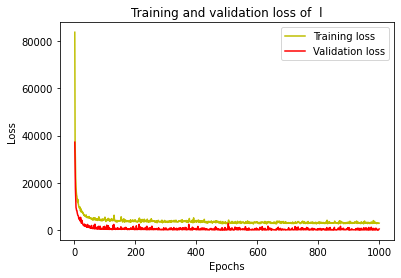

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

loss_l = history_l.history['loss']
val_loss_l = history_l.history['val_loss']
epochs = range(1, len(loss_l) + 1)
plt.plot(epochs, loss_l, 'y', label='Training loss')
plt.plot(epochs, val_loss_l, 'r', label='Validation loss')
plt.title('Training and validation loss of  l')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


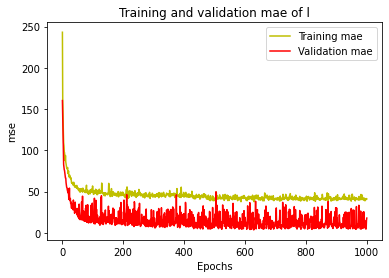

In [ ]:
mae_l = history_l.history['mae']
val_mae_l = history_l.history['val_mae']
plt.plot(epochs, mae_l, 'y', label='Training mae')
plt.plot(epochs, val_mae_l, 'r', label='Validation mae')
plt.title('Training and validation mae of l')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

In [ ]:
#PARA D

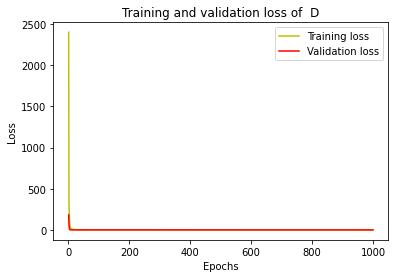

In [ ]:

loss_D = history_D.history['loss']
val_loss_D = history_D.history['val_loss']
epochs = range(1, len(loss_D) + 1)
plt.plot(epochs, loss_D, 'y', label='Training loss')
plt.plot(epochs, val_loss_D, 'r', label='Validation loss')
plt.title('Training and validation loss of  D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

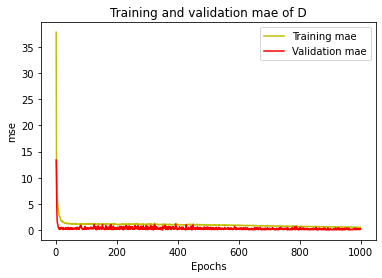

In [ ]:
mae_D = history_D.history['mae']
val_mae_D = history_D.history['val_mae']
plt.plot(epochs, mae_D, 'y', label='Training mae')
plt.plot(epochs, val_mae_D, 'r', label='Validation mae')
plt.title('Training and validation mae of D')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

In [ ]:
#PARA Alpha

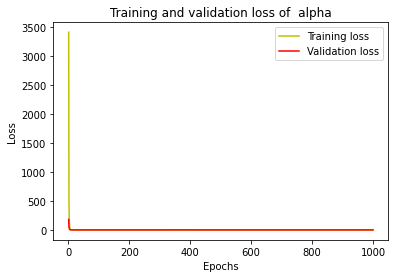

In [ ]:
loss_alpha = history_alpha.history['loss']
val_loss_alpha = history_alpha.history['val_loss']
epochs = range(1, len(loss_alpha) + 1)
plt.plot(epochs, loss_alpha, 'y', label='Training loss')
plt.plot(epochs, val_loss_alpha, 'r', label='Validation loss')
plt.title('Training and validation loss of  alpha')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

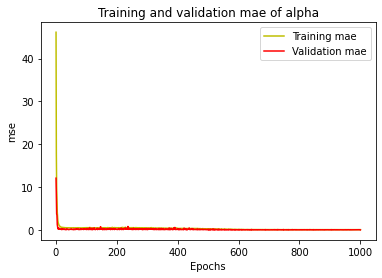

In [ ]:
mae_alpha = history_alpha.history['mae']
val_mae_alpha = history_alpha.history['val_mae']
plt.plot(epochs, mae_alpha, 'y', label='Training mae')
plt.plot(epochs, val_mae_alpha, 'r', label='Validation mae')
plt.title('Training and validation mae of alpha')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

# Predicción del modelo

In [ ]:
y_pred_l = model_l.predict(X_test_l)
y_pred_D = model_D.predict(X_test_D)
y_pred_alpha = model_alpha.predict(X_test_alpha)

In [ ]:
y_pred_l[:10]

array([[146.72018],
       [346.24738],
       [450.7149 ],
       [556.1572 ],
       [293.18683],
       [486.12415],
       [186.15329],
       [161.29771],
       [381.2591 ],
       [588.05743]], dtype=float32)

In [ ]:
y_pred_D[:10]

array([[9.081413 ],
       [9.143514 ],
       [7.8074074],
       [8.285139 ],
       [8.846901 ],
       [8.176674 ],
       [9.118153 ],
       [7.978882 ],
       [8.541467 ],
       [8.554241 ]], dtype=float32)

In [ ]:
y_pred_alpha[:10]

array([[2.6861768],
       [2.5729086],
       [2.3593247],
       [2.399875 ],
       [2.6425629],
       [2.378335 ],
       [2.6802263],
       [2.8830514],
       [2.5025163],
       [2.7383857]], dtype=float32)